# **Условие задачи**

 Представим, что у нас есть город с координатами 100 на 100. Как на уроках геометрии, мы могли бы расположить наш город на координатах X и Y. Для записи координат будем использовать формат (x, y).Район в верхнем левом углу имеет координаты (0, 0) **city_map[0][0]**. А правый нижний район имел бы координаты (99, 99) **city_map[99][99]**. Таким образом каждый район закодирован двумя индексами x и y, которые соответствуют его координатам **city_map[y][x]**.

В нашем городе есть большая река с 4-мя мостами, как изображено на картинке ниже. Карта города также закодирована при помощи списка из списков city_map_list.

В переменных courier_location, orders_location, city_map_list сохранены позиции курьера, координаты доставок и карта города.

courier_location — tuple из двух целых чисел. Координаты стартового местоположения курьера в формате (x, y). Где x и y — это целые числа от 0 до 9.

Пример courier_location = (10, 10)

orders_location — список как минимум из одного tuple с координатами. Координаты, по которым курьер должен доставить заказы. В списке хранится произвольное число tuple с координатами точек назначения, которые должен посетить курьер.

Пример orders_location = [(1, 1), (92, 13), (46, 33)]

city_map_list — список из списков 100 на 100, карта города, которую мы загрузили выше. Вам известно местоположение курьера, набор координат мест назначения и карта города. Теперь нужно написать скрипт, который создаст переменную route и сохранит в нее маршрут, по которому должен пройти курьер, чтобы разнести все заказы. При формировании маршрута необходимо выполнить следующие условия:

Маршрут должен проходить только по земле, по воде ходить нельзя. Курьеры могут перемещаться на один шаг из текущего района вправо, влево, вниз или вверх. Маршрут должен быть сохранен в список, где каждый элемент — это tuple с координатами каждого шага курьера. Курьер проходит один шаг за 10 минут и может доставлять заказ в любом порядке.

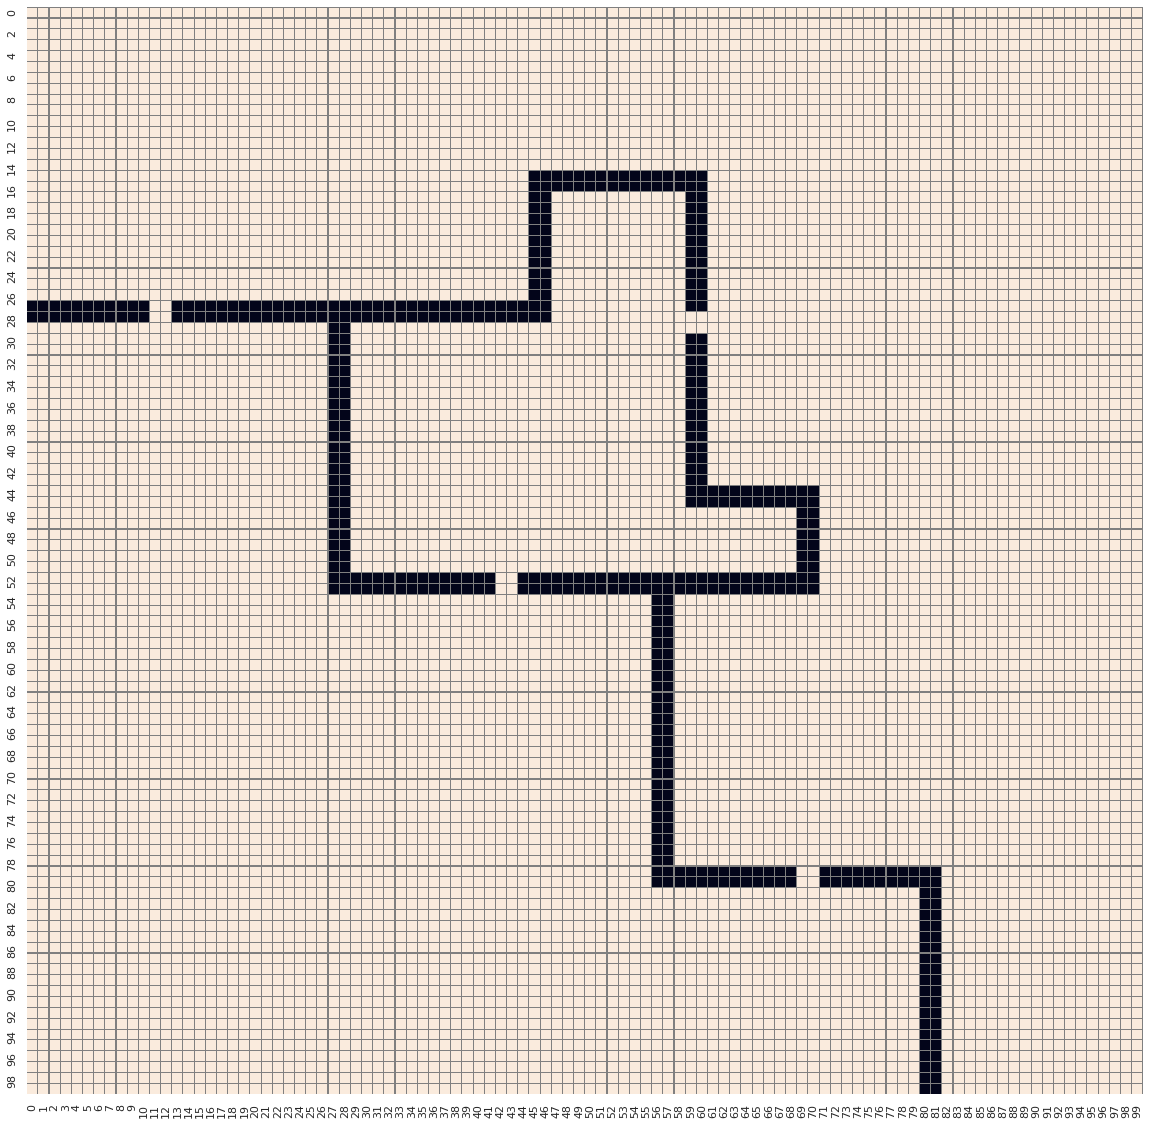

In [10]:
from IPython.display import Image, display
image_path = 'C:\\Users\\User\\notebooks\\city_map.png'
display(Image(filename=image_path))


In [15]:
# Импортируем необходимую библиотеку и загрузим файл city_map_list
import pandas as pd

url='https://drive.google.com/uc?id=1-crPzL6qMinByPzsrEHhGn1EJ1MfD3GX'
df = pd.read_csv(url, names=list(range(0, 100, 1)))
city_map_list = df.values.tolist()

In [16]:
# Зададим переменные courier_location и orders_location рандомно для проверки работы кода
courier_location = (84, 17)
orders_location = [(66, 32), (39, 75), (90, 10), (89, 60), (79, 77), (65, 38), (9, 5)]
route = []

In [17]:
def navigator(start, end):
# Создаем матрицу размером city_map_list с нулями, кроме поля start = 1
    m = []
    for i in range(len(city_map_list)):
        m.append([])
        for j in range(len(city_map_list[i])):
            m[-1].append(0)
    i,j = start[1], start[0] 
    m[i][j] = 1
# Теперь создадим функцию только для одного шага, которая заполняем цифрами поля вокруг нашего, если нет препятствий city_map_list[i-1][j] == 1
    def make_step(k):
        for i in range(len(m)):
            for j in range(len(m[i])):
                if m[i][j] == k:
                    if i>0 and m[i-1][j] == 0 and city_map_list[i-1][j] == 1:
                        m[i-1][j] = k + 1
                    if j>0 and m[i][j-1] == 0 and city_map_list[i][j-1] == 1:
                        m[i][j-1] = k + 1
                    if i<len(m)-1 and m[i+1][j] == 0 and city_map_list[i+1][j] == 1:
                        m[i+1][j] = k + 1
                    if j<len(m[i])-1 and m[i][j+1] == 0 and city_map_list[i][j+1] == 1:
                        m[i][j+1] = k + 1
# Далее цикл, который заполнит цифрами до точки end
    k = 0
    while m[end[1]][end[0]] == 0:
        k += 1
        make_step(k)
# Далее нахождение кратчайшего пути в этой матрице чисел, не равных 0
    i, j = end[1], end[0]
    k = m[i][j]
    the_path = [(i,j)]
    while k > 1:
      if i > 0 and m[i - 1][j] == k-1:
        i, j = i-1, j
        the_path.append((i, j))
        k-=1
      elif j > 0 and m[i][j - 1] == k-1:
        i, j = i, j-1
        the_path.append((i, j))
        k-=1
      elif i < len(m) - 1 and m[i + 1][j] == k-1:
        i, j = i+1, j
        the_path.append((i, j))
        k-=1
      elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
        i, j = i, j+1
        the_path.append((i, j))
        k -= 1

    result = the_path[::-1]
    the_path_sort = [(tup[1], tup[0]) for tup in result]

    return the_path_sort

In [18]:
# Нахождение списка кортежей координат передвижения курьера от точки старта, до координат 1-й доставки 
# и добавление данного списка в route
new_result = navigator(courier_location, orders_location[0])
route.extend(new_result)

In [20]:
# Далее проходимся циклом от точки к точки и добавляем все списки координат в конечный список route
for i in range(len(orders_location) - 1):
    start = orders_location[i]
    end = orders_location[i + 1]
    new_result_1 = navigator(start, end)
    route.extend(new_result_1[1:])

In [22]:
print(f'Число пройденных координат от старта до последней доставки: {len(route)}')

Число пройденных координат от старта до последней доставки: 858
